In [35]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.models import load_model,Model
import random

In [36]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [37]:
import copy
x_tmp = copy.deepcopy(x_test[0])

1


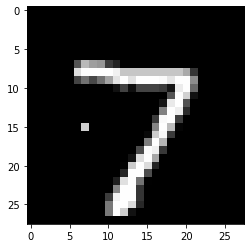

4


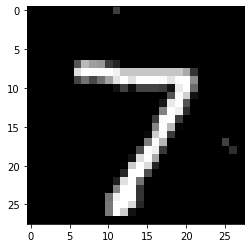

5


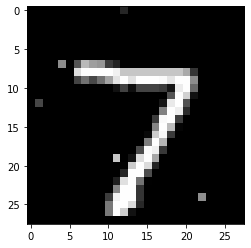

2


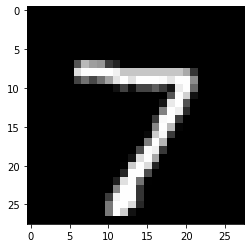

4


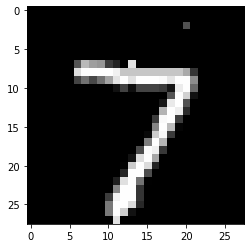

2


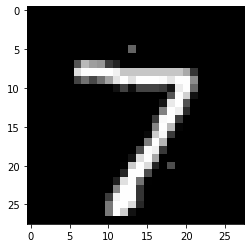

1


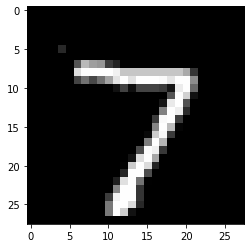

1


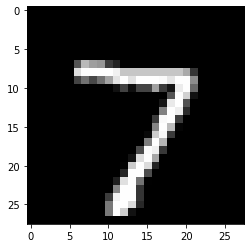

5


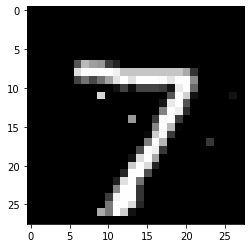

3


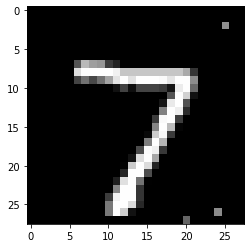

In [38]:
x_des = []
for r in range(10):
    x = []
    y = []
    L = random.randint(1,5)
    for i in range(L):
        x.append(random.randint(0,27))
        y.append(random.randint(0,27))
        x_tmp[x[i],y[i]] = random.randint(0,254)
    x_t = x_tmp/255
    x_des.append(np.array(x_t.reshape(1,784)))
    print(L)
    plt.imshow(x_tmp,cmap='gray')
    plt.show()
    x_tmp = copy.deepcopy(x_test[0])

In [40]:
x_des[9]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [41]:
x_train = x_train.reshape(60000,784) # 将图片摊平，变成向量
x_test = x_test.reshape(10000,784) # 对测试集进行同样的处理

In [42]:
x_train = x_train / 255
x_test = x_test / 255

In [43]:
model = load_model('mnist_model.h5')

In [45]:
X = np.array(x_des)
X[9]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [46]:
def Func(x):
    result=model.predict(x[:].reshape(1,784))
    return result[0][7]

In [50]:
MAX_GENERATION = 1000  # 最大迭代次数
GENERATION = 0  # 当前代数
L = 784  # 种子的维度
N = 10  # 种群规模
SIGMA = 0.333  # 缩放因子
CR = 0.1  # 交叉概率
E = 0.15
T = 10
G = np.zeros(T)
for k in range(T):
        GENERATION = 0  # 当前代数
        BEST_X = 0
        FITS = np.zeros(N)
        FITS_U = np.zeros(N)
        V = np.zeros((N, L))
        U = np.zeros((N, L))
        # 1、初始化
        X = np.concatenate(x_des, axis=0)
        # 找出随机生成的最好的种子
        for i in range(N):
            FITS[i] = Func(X[i])
        # 找出最好的种子 适应度值最小
        BEST_X = X[np.argmin(FITS)]
        while GENERATION < MAX_GENERATION:
            if Func(BEST_X) < E:
                print(GENERATION)
                break
            # 2、变异
            for i in range(N):
                r = np.random.randint(1, N, 2)
                # 变异向量V[i, :]
                # 变异向量的基使用每次适应度值最好的个体BEST_X
                # V[i, :] = BEST_X + SIGMA * (X[r[0], :] - X[r[1], :]) + SIGMA * (X[r[2], :] - X[r[3], :])
                # V[i, :] = BEST_X + SIGMA * ((X[r[0], :] - X[r[1], :]) + (X[r[2], :] - X[r[3], :]))
                # SIGMA过大 无法收敛
                # SIGMA过小 早熟
                V[i, :] = BEST_X + SIGMA * (X[r[0], :] - X[r[1], :])
            # print(V)
            # 3、交叉操作
            for i in range(N):
                jRand = np.floor(np.random.random() * L)
                for j in range(L):
                    # 至少有一个分量对U[i,j]作出了贡献
                    # CR调小 有利于往BEST_X的方向进化
                    if np.random.random() > CR or j == jRand:
                        U[i, j] = X[i, j]
                    else:
                        U[i, j] = V[i, j]
                    #if np.random.random() < CR or j == jRand:
                        #U[i, j] = V[i, j]
                    #else:
                        #U[i, j] = X[i, j]
            # 4、计算适应度值+选择操作
            for i in range(N):
                FITS[i] = Func(X[i])
                FITS_U[i] = Func(U[i])
                # 变异的种子表现更好
                if FITS[i] >= FITS_U[i]:
                    X[i, :] = U[i, :]
                    FITS[i] = FITS_U[i]
                    # 是否比BEST_X适应度值更小
                    if FITS_U[i] < Func(BEST_X):
                        BEST_X = U[i, :]
            GENERATION += 1
            print("最优值：", Func(BEST_X))
        if GENERATION == MAX_GENERATION:
            print("当前次未能收敛")
        G[k] = GENERATION
print("代数：", G)
print("平均代数：", np.mean(G))

最优值： 0.996947
最优值： 0.996947
最优值： 0.9968657
最优值： 0.9968497
最优值： 0.99683255
最优值： 0.99678373
最优值： 0.99649733
最优值： 0.99649733
最优值： 0.9961641
最优值： 0.99583876
最优值： 0.99583876
最优值： 0.99570173
最优值： 0.99570173
最优值： 0.99570173
最优值： 0.99546117
最优值： 0.99549943
最优值： 0.99522203
最优值： 0.9952454
最优值： 0.9949886
最优值： 0.99474746
最优值： 0.9946326
最优值： 0.99457705
最优值： 0.9943051
最优值： 0.9943051
最优值： 0.9941292
最优值： 0.9939587
最优值： 0.99316686
最优值： 0.9931497
最优值： 0.9929253
最优值： 0.99285275
最优值： 0.9928532
最优值： 0.9918681
最优值： 0.9918681
最优值： 0.9918681
最优值： 0.99184424
最优值： 0.991812
最优值： 0.9914767
最优值： 0.99137723
最优值： 0.99137723
最优值： 0.99139845
最优值： 0.99137723
最优值： 0.99137723
最优值： 0.9908846
最优值： 0.99087536
最优值： 0.99086964
最优值： 0.9906206
最优值： 0.98953116
最优值： 0.9884821
最优值： 0.9884515
最优值： 0.9879907
最优值： 0.9846244
最优值： 0.98445165
最优值： 0.9844445
最优值： 0.98445165
最优值： 0.9808867
最优值： 0.97647744
最优值： 0.97647744
最优值： 0.97656393
最优值： 0.97584367
最优值： 0.9758164
最优值： 0.9758164
最优值： 0.9758164
最优值： 0.96591437
最优值： 0.9659345
最优值： 0.9626

KeyboardInterrupt: 